# Table of Contents

- Check for Personally Indentifiable Information (PII)
- Assign regions customer orders
- Identify and seperate users with low frequency
- Create customer profile (age, income, dependants)
- Find stats for customer profile
- Export data and visualizations


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# setting master path
path = r'/Users/Norberto/Desktop/2023-10 Instacart Basket Analysis'

# setting pandas option
pd.set_option('display.max_columns',None)

### Step 1
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# read pkl file
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### Step 2
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [3]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_day_new', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending', 'spending_flag', 'dspo_median', 'order_frequency_flag',
       'gender', 'state', 'age', 'num_depend', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [4]:
ords_prods_merge.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both


During data cleaning, first names and surnames were removed from the df since they weren't necessary for the analysis. Age, gender, and state are left behind because their is no information that ties it to any individual and can still provide inside to customer behavior.

### Step 3
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [5]:
# List states and regions in lists
regions = ['Northeast', 'Midwest', 'South', 'West', ]
northeast = ['Maine','New Hampshire','Vermont',
             'Massachusetts','Rhode Island','Connecticut',
             'New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois',
           'Indiana','Ohio','North Dakota',
           'South Dakota','Nebraska','Kansas',
           'Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia',
         'Virginia','West Virginia','North Carolina',
         'South Carolina','Georgia','Florida',
         'Kentucky','Tennessee','Mississippi',
         'Alabama','Oklahoma','Texas',
         'Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming',
        'Nevada','Utah','Colorado',
        'Arizona','New Mexico','Alaska',
        'Washington','Oregon','California','Hawaii']
allstates = northeast + midwest + south + west

In [6]:
# Create a list of lists with each state and region paired correctly.
states_region = []
for state in allstates:
    for region in regions:
        if state in northeast:
            states_region.append([state, 'Northeast'])
            break
        if state in midwest:
            states_region.append([state, 'Midwest'])
            break
        if state in south:
            states_region.append([state, 'South'])
            break
        if state in west:
            states_region.append([state, 'West'])
            break

In [7]:
# Convert list of lists to pandas df
df_regions = pd.DataFrame(states_region)

# update index in dataframe
df_regions.columns = ['state', 'region']

In [8]:
# Create test df to test merge
df_test = ords_prods_merge[:1000000]

In [9]:
# Merge new regions df with test df to make sure results are okay
merge_test = df_test.merge(df_regions, on='state', how='inner')
merge_test.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South


In [10]:
# Check value counts to ensure proper merge
merge_test['region'].value_counts(dropna=False)

region
South        324933
West         267618
Midwest      227275
Northeast    180174
Name: count, dtype: int64

In [11]:
# Perform merge on main df
ords_prods_regions = ords_prods_merge.merge(df_regions, on='state', how='inner')
ords_prods_regions.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2428073,52,7,2,7,8.0,12341,2,1,Hass Avocados,32.0,4.0,9.1,Mid-range product,Regularly busy,Regularly busy,Average orders,27,Regular customer,6.356287,High Spender,8.0,Frequent customer,Female,Alabama,64,2,married,40974,both,South
96,2428073,52,7,2,7,8.0,6184,3,1,Clementines,32.0,4.0,4.3,Low-range product,Regularly busy,Regularly busy,Average orders,27,Regular customer,6.356287,High Spender,8.0,Frequent customer,Female,Alabama,64,2,married,40974,both,South
97,2428073,52,7,2,7,8.0,46149,4,1,Zero Calorie Cola,77.0,7.0,13.4,Mid-range product,Regularly busy,Regularly busy,Average orders,27,Regular customer,6.356287,High Spender,8.0,Frequent customer,Female,Alabama,64,2,married,40974,both,South
98,2428073,52,7,2,7,8.0,196,5,1,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,27,Regular customer,6.356287,High Spender,8.0,Frequent customer,Female,Alabama,64,2,married,40974,both,South


In [12]:
# Drop old merge indicator column
ords_prods_regions = ords_prods_regions.drop(columns='_merge')


# Check counts to ensure proper merge
ords_prods_regions['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
crosstab = pd.crosstab(ords_prods_regions['region'], ords_prods_regions['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,7441393,155932
Northeast,5614556,108180
South,10582404,209481
West,8132642,160271


Within regions, there seems to be little variation in customer behavior. The ratio of high to low spenders stay roughly the same across all regions. However, about 1/3 of all customers are based in the South giving them the largest share of high spenders.

### Step 4
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
# create a table grouping users by their id and displaying their max order number
df_user_order_count = ords_prods_regions.groupby('user_id').agg({'order_number':'max'})
df_user_order_count.loc[df_user_order_count['order_number'] < 5, 'activity_flag'] = 'low-activity'
df_user_order_count

,order_number,activity_flag
user_id,,
1,10,NaN
10,5,NaN
100,5,NaN
1000,7,NaN
10000,72,NaN
...,...,...
99995,5,NaN
99996,12,NaN
99997,3,low-activity


In [16]:
df_user_order_count = df_user_order_count.drop(columns = ['order_number'])
ords_prods_regions_activity = ords_prods_regions.merge(df_user_order_count, on = 'user_id', how='inner')
ords_prods_regions_activity.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
5,2398795,1,2,3,7,15.0,196,1,1,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN


In [17]:
ords_prods_regions_activity['activity_flag'].value_counts(dropna=False)

activity_flag
NaN             30964564
low-activity     1440295
Name: count, dtype: int64

In [18]:
# create subset of df with flagged users
df_lowactivity = ords_prods_regions_activity[ords_prods_regions_activity['activity_flag']=='low-activity']
df_lowactivity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,region,activity_flag
2264,2916857,460,1,6,14,NaN,47866,1,0,Jalapeno Potato Chips,107.0,19.0,4.2,Low-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.171053,High Spender,30.0,Non-frequent customer,Female,Alabama,69,1,married,99216,South,low-activity
2265,2916857,460,1,6,14,NaN,47209,2,0,Organic Hass Avocado,24.0,4.0,4.0,Low-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.171053,High Spender,30.0,Non-frequent customer,Female,Alabama,69,1,married,99216,South,low-activity
2266,2916857,460,1,6,14,NaN,26209,3,0,Limes,24.0,4.0,14.7,Mid-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.171053,High Spender,30.0,Non-frequent customer,Female,Alabama,69,1,married,99216,South,low-activity
2267,2916857,460,1,6,14,NaN,34658,4,0,100% Recycled 2 Ply Jumbo Paper Towel Roll,54.0,17.0,3.5,Low-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.171053,High Spender,30.0,Non-frequent customer,Female,Alabama,69,1,married,99216,South,low-activity
2268,2916857,460,1,6,14,NaN,5969,5,0,Black Bean Tortilla Chips,107.0,19.0,4.1,Low-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.171053,High Spender,30.0,Non-frequent customer,Female,Alabama,69,1,married,99216,South,low-activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403644,1032826,205734,2,3,10,30.0,44056,5,0,Green Plantains,24.0,4.0,12.5,Mid-range product,Regularly busy,Least busy,Most orders,3,New customer,7.625000,High Spender,30.0,Non-frequent customer,Female,Wyoming,64,1,married,68559,West,low-activity
32403645,3247008,205734,3,0,11,11.0,31683,1,1,Original No Pulp 100% Florida Orange Juice,31.0,7.0,1.8,Low-range product,Busiest day,Busiest days,Most orders,3,New customer,7.625000,High Spender,30.0,Non-frequent customer,Female,Wyoming,64,1,married,68559,West,low-activity
32403646,3247008,205734,3,0,11,11.0,25340,2,1,Large Yellow Flesh Nectarine,24.0,4.0,7.3,Mid-range product,Busiest day,Busiest days,Most orders,3,New customer,7.625000,High Spender,30.0,Non-frequent customer,Female,Wyoming,64,1,married,68559,West,low-activity
32403647,3247008,205734,3,0,11,11.0,30489,3,1,Original Hummus,67.0,20.0,7.5,Mid-range product,Busiest day,Busiest days,Most orders,3,New customer,7.625000,High Spender,30.0,Non-frequent customer,Female,Wyoming,64,1,married,68559,West,low-activity


In [19]:
# create subset with remaining values
ords_prods_df = ords_prods_regions_activity[ords_prods_regions_activity['activity_flag'].isnull()]
ords_prods_df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,452589,206193,41,0,15,3.0,35921,17,1,Organic Large Grade A Brown Eggs,86.0,16.0,6.9,Mid-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN
32404855,452589,206193,41,0,15,3.0,13988,18,0,Snow Peas,83.0,4.0,6.7,Mid-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN
32404856,452589,206193,41,0,15,3.0,26629,19,0,Cherry Pie Fruit & Nut Bar,3.0,19.0,4.0,Low-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN
32404857,452589,206193,41,0,15,3.0,21914,20,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3.0,19.0,1.9,Low-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN


In [20]:
# exporting low-activity users to seperate pickle file
df_lowactivity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

### Steps 5 & 6
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
- (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Create an appropriate visualization to show the distribution of profiles.


In [21]:
# creating new 'age_group' column and assigning values based on age
ords_prods_df.loc[ords_prods_df['age'] < 30, 'age_group'] = 'Young'
ords_prods_df.loc[(ords_prods_df['age'] >= 30) & (ords_prods_df['age'] <= 45), 'age_group'] = 'Middle-Aged'
ords_prods_df.loc[ords_prods_df['age'] > 45, 'age_group'] = 'Old-Aged'

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/2229972697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['age'] < 30, 'age_group'] = 'Young'


In [22]:
# checking new column
ords_prods_df['age_group'].value_counts(dropna=False)

age_group
Old-Aged       17397507
Middle-Aged     7749454
Young           5817603
Name: count, dtype: int64

In [23]:
# creating new 'income_group' column and assigning values based on income
ords_prods_df.loc[ords_prods_df['income'] < 40000, 'income_group'] = 'Lower Income'
ords_prods_df.loc[(ords_prods_df['income'] >= 40000) & (ords_prods_df['income'] < 90000), 'income_group'] = 'Middle Income'
ords_prods_df.loc[(ords_prods_df['income'] >= 90000) & (ords_prods_df['income'] < 125000), 'income_group'] = 'Upper Middle Income'
ords_prods_df.loc[ords_prods_df['income'] >= 125000, 'income_group'] = 'Higher Income'

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/3612888461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['income'] < 40000, 'income_group'] = 'Lower Income'


In [24]:
# checking new column
ords_prods_df['income_group'].value_counts(dropna=False)

income_group
Middle Income          11522595
Upper Middle Income     9551900
Higher Income           8278044
Lower Income            1612025
Name: count, dtype: int64

In [25]:
# creating new 'depend_group' column and assigning values based on number of dependants
ords_prods_df.loc[ords_prods_df['num_depend'] == 0, 'depend_group'] = 'Adult'
ords_prods_df.loc[ords_prods_df['num_depend'] > 0, 'depend_group'] = 'Parent'

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/3929036903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['num_depend'] == 0, 'depend_group'] = 'Adult'


In [26]:
# checking new column
ords_prods_df['depend_group'].value_counts(dropna=False)

depend_group
Parent    23224883
Adult      7739681
Name: count, dtype: int64

In [27]:
# check expected value counts of customer profile
customer_profile = ['age_group','income_group','depend_group']
ords_prods_df[customer_profile].value_counts(dropna=False)

age_group    income_group         depend_group
Old-Aged     Higher Income        Parent          5322201
             Upper Middle Income  Parent          5117909
Middle-Aged  Middle Income        Parent          3313408
Young        Middle Income        Parent          3288258
Old-Aged     Middle Income        Parent          2056047
             Higher Income        Adult           1811444
             Upper Middle Income  Adult           1689185
Middle-Aged  Upper Middle Income  Parent          1342512
             Middle Income        Adult           1111477
Young        Middle Income        Adult           1084832
Middle-Aged  Higher Income        Parent           804358
Young        Upper Middle Income  Parent           720639
Old-Aged     Middle Income        Adult            668573
             Lower Income         Parent           547296
Middle-Aged  Upper Middle Income  Adult            439020
             Lower Income         Parent           351167
Young        Lower Income

In [28]:
# create new column joining the different groups together to form the customer profile
ords_prods_df['cust_prof'] = ords_prods_df['age_group'] + ' ' + ords_prods_df['income_group'] + ' ' + ords_prods_df['depend_group']

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/2298107806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df['cust_prof'] = ords_prods_df['age_group'] + ' ' + ords_prods_df['income_group'] + ' ' + ords_prods_df['depend_group']


In [29]:
# checking new column
ords_prods_df['cust_prof'].value_counts(dropna=False).sort_index()

cust_prof
Middle-Aged Higher Income Adult            271065
Middle-Aged Higher Income Parent           804358
Middle-Aged Lower Income Adult             116447
Middle-Aged Lower Income Parent            351167
Middle-Aged Middle Income Adult           1111477
Middle-Aged Middle Income Parent          3313408
Middle-Aged Upper Middle Income Adult      439020
Middle-Aged Upper Middle Income Parent    1342512
Old-Aged Higher Income Adult              1811444
Old-Aged Higher Income Parent             5322201
Old-Aged Lower Income Adult                184852
Old-Aged Lower Income Parent               547296
Old-Aged Middle Income Adult               668573
Old-Aged Middle Income Parent             2056047
Old-Aged Upper Middle Income Adult        1689185
Old-Aged Upper Middle Income Parent       5117909
Young Higher Income Adult                   14408
Young Higher Income Parent                  54568
Young Lower Income Adult                   105743
Young Lower Income Parent               

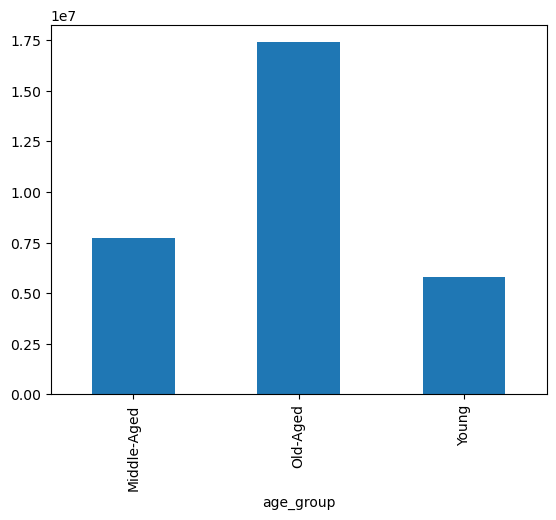

In [30]:
# create bar graph for age group
bar1 = ords_prods_df['age_group'].value_counts().sort_index().plot.bar()

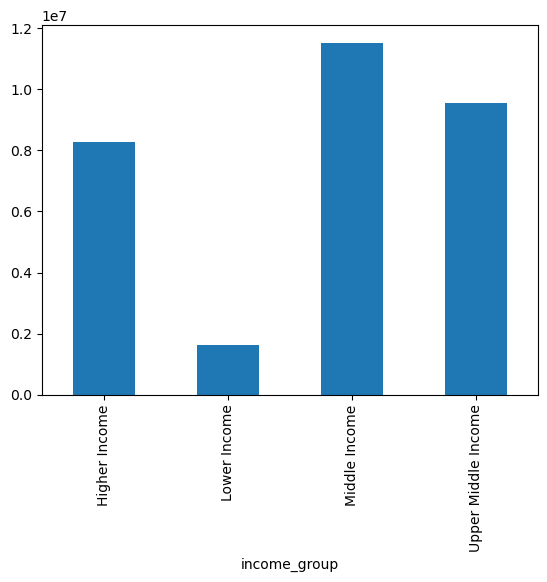

In [31]:
# create bar graph for income group
bar2 = ords_prods_df['income_group'].value_counts().sort_index().plot.bar()

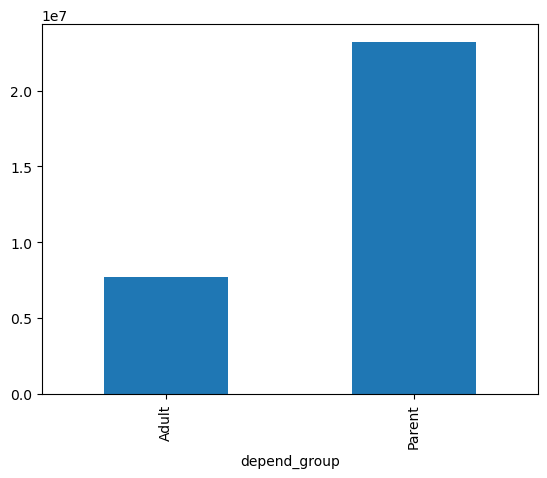

In [32]:
# create bar graph for dependants group
bar3 = ords_prods_df['depend_group'].value_counts().sort_index().plot.bar()

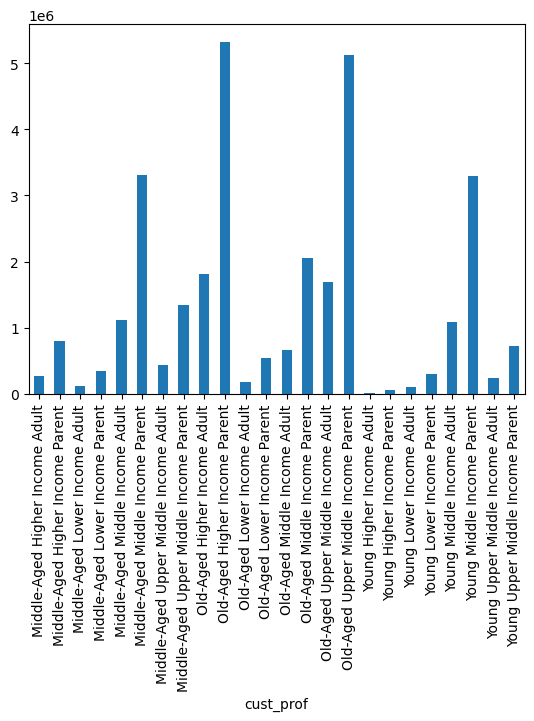

In [33]:
# create bar graph for entire customer profile
bar4 = ords_prods_df['cust_prof'].value_counts().sort_index().plot.bar()

In [34]:
# read departments csv
departments_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
departments_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# create new column for users that have pets
ords_prods_df.loc[ords_prods_df['department_id'] == 8, 'has_pets?'] = 1

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/362715599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['department_id'] == 8, 'has_pets?'] = 1


In [36]:
# checking new column
ords_prods_df['has_pets?'].value_counts(dropna=False).sort_index()

has_pets?
1.0       93060
NaN    30871504
Name: count, dtype: int64

In [37]:
# create new column for users that have babies
ords_prods_df.loc[ords_prods_df['department_id'] == 18, 'has_babies?'] = 1

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/3509956041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['department_id'] == 18, 'has_babies?'] = 1


In [38]:
# checking new column
ords_prods_df['has_babies?'].value_counts(dropna=False).sort_index()

has_babies?
1.0      410392
NaN    30554172
Name: count, dtype: int64

In [39]:
# create new column for users that drink alcohol
ords_prods_df.loc[ords_prods_df['department_id'] == 5, 'drinks_alcohol?'] = 1

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_30937/2657371193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_df.loc[ords_prods_df['department_id'] == 5, 'drinks_alcohol?'] = 1


In [40]:
# checking new column
ords_prods_df['drinks_alcohol?'].value_counts(dropna=False).sort_index()

drinks_alcohol?
1.0      144627
NaN    30819937
Name: count, dtype: int64

In [41]:
# create new df with customer profile and attribute flags
df_customer_prof = ords_prods_df.groupby(
    ['user_id','age_group','income_group','depend_group']).agg(
    {'has_pets?':'max',
     'has_babies?':'max',
     'drinks_alcohol?':'max'})

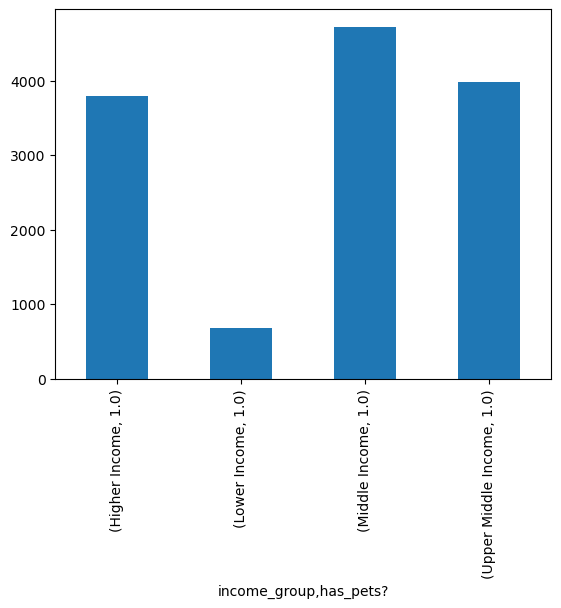

In [42]:
# create bar graph for users with pets, grouped by income group
bar5 = df_customer_prof['has_pets?'].groupby(['income_group']).value_counts().plot.bar()

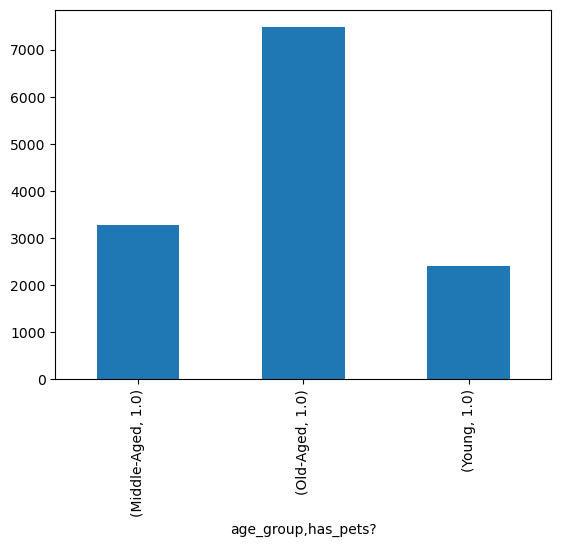

In [43]:
# create bar graph for users with pets, grouped by age group
bar6 = df_customer_prof['has_pets?'].groupby(['age_group']).value_counts().plot.bar()

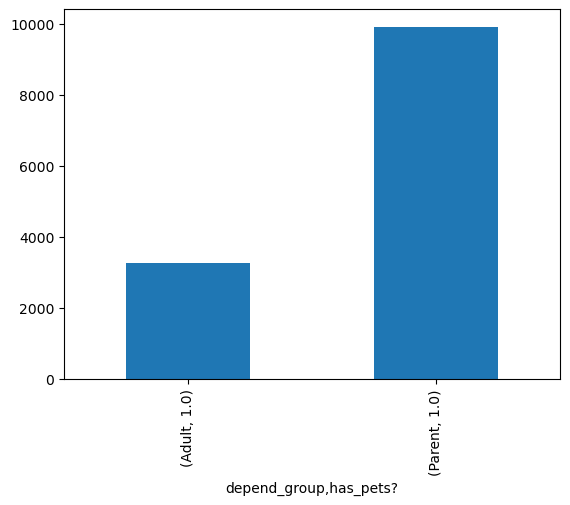

In [44]:
# create bar graph for users with pets, grouped by number of dependants
bar7 = df_customer_prof['has_pets?'].groupby(['depend_group']).value_counts().plot.bar()

### Step 7
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
# create table displaying max, mean, and min values for price and days since prior order based on customer_profile
ords_prods_df.groupby('cust_prof').agg({'prices': ['max','mean','min'],'days_since_prior_order': ['max','mean','min']})

prices                 \
                                          max      mean  min   
cust_prof                                                      
Middle-Aged Higher Income Adult          25.0  7.906989  1.0   
Middle-Aged Higher Income Parent         25.0  7.950725  1.0   
Middle-Aged Lower Income Adult           25.0  6.492580  1.0   
Middle-Aged Lower Income Parent          25.0  6.495349  1.0   
Middle-Aged Middle Income Adult          25.0  7.819188  1.0   
Middle-Aged Middle Income Parent         25.0  7.829904  1.0   
Middle-Aged Upper Middle Income Adult    25.0  7.969565  1.0   
Middle-Aged Upper Middle Income Parent   25.0  7.951217  1.0   
Old-Aged Higher Income Adult             25.0  7.948228  1.0   
Old-Aged Higher Income Parent            25.0  7.956521  1.0   
Old-Aged Lower Income Adult              25.0  6.506638  1.0   
Old-Aged Lower Income Parent             25.0  6.514380  1.0   
Old-Aged Middle Income Adult             25.0  7.313574  1.0   
Old-Aged Middle Income Parent            25.0  7.290660  1.0   
Old-Aged Upper Middle Income Adult       25.0  7.968599  1.0   
Old-Aged Upper Middle Income Parent      25.0  7.957076  1.0   
Young Higher Income Adult                25.0  7.795828  1.0   
Young Higher Income Parent               25.0  7.795251  1.0   
Young Lower Income Adult                 25.0  6.491372  1.0   
Young Lower Income Parent                25.0  6.496672  1.0   
Young Middle Income Adult                25.0  7.850888  1.0   
Young Middle Income Parent               25.0  7.870551  1.0   
Young Upper Middle Income Adult          25.0  7.968867  1.0   
Young Upper Middle Income Parent         25.0  7.947797  1.0   

                                       days_since_prior_order                  
                                                          max       mean  min  
cust_prof                                                                      
Middle-Aged Higher Income Adult                          30.0  10.743481  0.0  
Middle-Aged Higher Income Parent                         30.0  10.811009  0.0  
Middle-Aged Lower Income Adult                           30.0  11.516475  0.0  
Middle-Aged Lower Income Parent                          30.0  11.402940  0.0  
Middle-Aged Middle Income Adult                          30.0  10.706984  0.0  
Middle-Aged Middle Income Parent                         30.0  10.746707  0.0  
Middle-Aged Upper Middle Income Adult                    30.0  10.988340  0.0  
Middle-Aged Upper Middle Income Parent                   30.0  10.785199  0.0  
Old-Aged Higher Income Adult                             30.0  10.634003  0.0  
Old-Aged Higher Income Parent                            30.0  10.798264  0.0  
Old-Aged Lower Income Adult                              30.0  10.864053  0.0  
Old-Aged Lower Income Parent                             30.0  11.299921  0.0  
Old-Aged Middle Income Adult                             30.0  10.827209  0.0  
Old-Aged Middle Income Parent                            30.0  10.915177  0.0  
Old-Aged Upper Middle Income Adult                       30.0  10.794435  0.0  
Old-Aged Upper Middle Income Parent                      30.0  10.788630  0.0  
Young Higher Income Adult                                30.0  10.387500  0.0  
Young Higher Income Parent                               30.0   9.913796  0.0  
Young Lower Income Adult                                 30.0  11.484425  0.0  
Young Lower Income Parent                                30.0  11.162065  0.0  
Young Middle Income Adult                                30.0  10.956675  0.0  
Young Middle Income Parent                               30.0  10.789240  0.0  
Young Upper Middle Income Adult                          30.0  10.536501  0.0  
Young Upper Middle Income Parent                         30.0  10.649128  0.0

### Step 8
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [46]:
# create crosstab comparing customer profile and department_id
ct = pd.crosstab(ords_prods_df['cust_prof'], ords_prods_df['department_id'], dropna = False, normalize='index') * 100

In [47]:
# check table for output
ct

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
cust_prof,,,,,,,,,,,,,,,,,,,,,
Middle-Aged Higher Income Adult,6.922325,0.119529,3.684356,29.330234,0.738937,0.795381,7.806615,0.464833,2.751001,0.091122,1.341745,2.267353,5.968679,2.080682,3.436445,16.915131,2.534447,1.689632,7.731356,3.090403,0.239795
Middle-Aged Higher Income Parent,6.989052,0.104307,3.886329,28.753366,0.623230,0.856459,7.877463,0.362898,2.743803,0.084291,1.322670,2.465693,5.919379,2.134622,3.405076,17.367888,2.418699,1.321675,7.898597,3.272423,0.192079
Middle-Aged Lower Income Adult,6.354822,0.175187,2.818450,24.178382,0.657810,0.586533,11.856038,0.262780,1.788797,0.153718,1.224591,0.824409,4.741213,2.899173,2.086786,14.763798,2.247374,0.626036,18.228035,3.264146,0.261922
Middle-Aged Lower Income Parent,6.386990,0.108211,3.256855,23.722047,0.555007,0.619648,11.732025,0.226103,1.827620,0.149217,1.358328,0.789938,4.887988,2.767914,2.276410,14.324808,2.747126,0.961366,17.838521,3.291881,0.171998
Middle-Aged Middle Income Adult,6.733563,0.114262,3.717936,29.880510,0.426010,0.825478,8.117127,0.287815,2.604192,0.099147,1.405427,2.141025,5.636374,2.079485,3.317388,16.882491,2.180162,1.384014,8.638955,3.314059,0.214579
Middle-Aged Middle Income Parent,6.783861,0.105752,3.568441,29.873532,0.432002,0.829810,8.081709,0.286442,2.664266,0.113418,1.370824,2.202898,5.763401,2.134811,3.254112,16.826029,2.194780,1.371096,8.712329,3.224505,0.205981
Middle-Aged Upper Middle Income Adult,6.696050,0.123229,3.896406,29.971983,0.456016,0.931620,8.243816,0.300897,2.667988,0.109790,1.389003,2.278712,5.803836,2.236345,3.372512,17.036581,2.158216,1.233657,7.690766,3.199626,0.202952
Middle-Aged Upper Middle Income Parent,6.895804,0.101154,3.648682,30.111388,0.443125,0.859583,7.792035,0.270538,2.812340,0.100036,1.368330,2.341283,5.907508,2.026053,3.388126,17.022716,2.277894,1.357902,7.801569,3.266786,0.207149
Old-Aged Higher Income Adult,7.018544,0.109581,3.714495,29.852814,0.517598,0.857217,8.051588,0.334374,2.700553,0.097933,1.363663,2.280446,5.898609,2.062940,3.321825,16.966078,2.196204,1.341195,7.851140,3.266676,0.196528


In [48]:
# look at table stats to compare differences between customer profiles
ct.describe()

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.778893,0.125342,3.623764,27.253429,0.664970,0.797867,9.150212,0.336928,2.497403,0.105344,1.425807,1.886289,5.572626,2.356318,3.048623,16.355734,2.535733,1.177107,10.887458,3.214397,0.205755
std,0.467538,0.043167,0.596245,3.639831,0.577936,0.120196,1.660187,0.118916,0.412953,0.034065,0.194442,0.677662,0.527620,0.336803,0.551385,1.040036,0.730746,0.332520,4.467494,0.133701,0.026918
min,6.255057,0.101154,2.818450,18.899223,0.398771,0.564235,7.786122,0.226103,1.756636,0.014661,1.184083,0.732416,4.540976,1.983226,2.012421,14.324808,2.031034,0.424123,7.580356,2.701217,0.128280
25%,6.432643,0.107947,3.358428,24.064298,0.449058,0.758946,7.867764,0.274850,2.253606,0.098844,1.353581,1.438736,5.170369,2.081678,2.706413,15.578410,2.195848,0.936676,7.784016,3.201421,0.194541
50%,6.781856,0.112197,3.650937,29.461648,0.469730,0.836761,8.137720,0.294035,2.706841,0.106836,1.380580,2.252237,5.813505,2.169858,3.353941,16.908975,2.261911,1.344986,8.249984,3.231041,0.206565
75%,6.937179,0.122080,3.718086,29.875277,0.578301,0.856649,10.089678,0.346770,2.755441,0.123036,1.423560,2.348416,5.905046,2.698007,3.396927,16.999751,2.544459,1.384183,13.705509,3.268324,0.216878
max,8.620437,0.313370,5.725986,31.127826,2.976103,1.089672,12.107342,0.798168,3.095502,0.154147,2.123820,2.686008,6.489450,2.915972,3.789767,17.783316,5.330372,1.689632,19.032363,3.423249,0.261922


#### Analysis
Departments 4(alcohol) and 19(deli) show the most significant variation amongst customer profiles while the remainder of the departments do not seem to be affected. Department 7(pets) shows some variation between customer profile that can be capitalized on.

Although the full table was more difficult to look at and compare, once the normalized data was described, it was easy to see most departments had little deviation between profiles, except for the mentioned ones above.

In [49]:
# create crosstab comparing customer profile and region
ct2 = pd.crosstab(ords_prods_df['cust_prof'], ords_prods_df['region'], dropna = False, normalize='index') * 100

In [50]:
# check table for output
ct2

region,Midwest,Northeast,South,West
cust_prof,,,,
Middle-Aged Higher Income Adult,26.177854,15.696604,36.955343,21.170199
Middle-Aged Higher Income Parent,23.398785,17.607458,32.281273,26.712484
Middle-Aged Lower Income Adult,24.922068,15.984096,34.243905,24.849932
Middle-Aged Lower Income Parent,25.924987,17.153092,32.348142,24.573778
Middle-Aged Middle Income Adult,23.191573,17.002781,34.236246,25.569400
Middle-Aged Middle Income Parent,23.114600,17.333422,34.378441,25.173537
Middle-Aged Upper Middle Income Adult,24.455150,15.984010,32.442486,27.118355
Middle-Aged Upper Middle Income Parent,23.698038,18.803407,32.793152,24.705403
Old-Aged Higher Income Adult,23.448972,17.724423,32.560046,26.266559


In [51]:
# look at table stats to compare differences between customer profiles
ct2.describe()

region,Midwest,Northeast,South,West
count,24.000000,24.000000,24.000000,24.000000
mean,23.907121,17.263286,33.845387,24.984207
std,2.305891,1.172007,1.514641,2.352180
min,20.126155,13.606876,31.886720,16.719878
25%,23.013048,16.924689,32.787142,24.694171
50%,23.503017,17.457671,33.298920,25.143030
75%,24.307869,17.887043,34.632855,26.145519
max,32.294559,18.869592,38.192714,29.231249


#### Analysis
Young Higher Income Adults are the most unique customer profile, with their greatest variation residing in the West and Midwest. All other customer profiles have similar distribution for each region except for YHIA that are present more in the Midwest than the West.

The max and min values in those two regions stand out in the stats description, and it belongs to a single group.

### Step 9 & 10
Produce suitable charts to illustrate your results and export them in your project folder.
- Tidy up your script, export your final data set, and save your notebook.

In [52]:
# saving all created visuals to correct folder
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups.png'))
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_groups.png'))
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depend_groups.png'))
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_petsXincome.png'))
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_petsXage.png'))
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_petsXdependents.png'))

In [53]:
# export final data set
ords_prods_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_final.pkl'))